# REGRESSION ANALYSIS

##### Contents:

- 01. Importing libraries and data
- 02. Hypothesis
- 03. Data prep for Regression Analysis
- 04. Regression analysis

### 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assign path

path = r'C:\Users\fiyin\OneDrive\Documents\Achievement 6\NYC Motor Vehicle Collisons Analysis'

In [3]:
# Import data

collisions = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'collisions_explored.pkl'))

In [4]:
collisions.shape

(1001137, 34)

In [5]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM,INJURED BOROUGH TOTAL,KILLED BOROUGH TOTAL
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2,0,...,2021-09,09,September,1.0,0.0,Covid and after,0.0,860.0,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1,0,...,2022-03,03,March,1.0,0.0,Covid and after,0.0,137.0,NaN,NaN
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0,0,...,2022-06,06,June,0.0,0.0,Covid and after,0.0,398.0,NaN,NaN
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0,0,...,2021-09,09,September,0.0,0.0,Covid and after,0.0,192.0,71157.0,288.0
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0,0,...,2021-12,12,December,0.0,0.0,Covid and after,0.0,222.0,71157.0,288.0


In [6]:
collisions_sub = collisions[['CRASH HOUR', 'PERSONS INJURED', 'PERSONS KILLED', 
                             'PEDESTRIANS INJURED','PEDESTRIANS KILLED', 
                             'CYCLISTS INJURED', 'CYCLISTS KILLED',
                             'MOTORISTS INJURED', 'MOTORISTS KILLED', 
                             'INJURED TOTAL', 'KILLED TOTAL']]

###  02. Hypothesis: 
Motorists are most likely to suffer from injuries during a car crash

- Independent variable: PERSONS INJURED
- Dependent variable: MOTORISTS INJURED

### 03. Data Prep for Regression Analysis

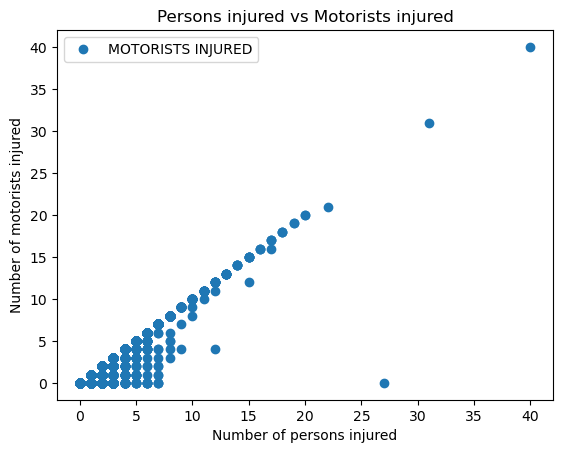

In [7]:
# Scatterplot 

collisions_sub.plot(x = 'PERSONS INJURED', y = 'MOTORISTS INJURED',style = 'o') 
plt.title('Persons injured vs Motorists injured')  
plt.xlabel('Number of persons injured')  
plt.ylabel('Number of motorists injured')  
## plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations2', 'motorist_persons_injured_scat.png'))
plt.show()

In [8]:
# Check case with high number of injuries and no motorist injuries

collisions.loc[(collisions_sub['PERSONS INJURED']  > 25) & (collisions['MOTORISTS INJURED'] == 0)]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM,INJURED BOROUGH TOTAL,KILLED BOROUGH TOTAL
881507,2017-05-18,11:54:00,MANHATTAN,10036.0,40.756035,-73.98695,"(40.756035, -73.98695)",7 AVENUE,27,1,...,2017-05,05,May,1.0,1.0,Before Covid,0.0,137.0,29674.0,147.0


In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = collisions_sub['PERSONS INJURED'].values.reshape(-1,1)
y = collisions_sub['MOTORISTS INJURED'].values.reshape(-1,1)

In [10]:
X

array([[2],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [11]:
y

array([[2],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 04. Regression Analysis

In [13]:
# Create a regression object.

regression = LinearRegression() 

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

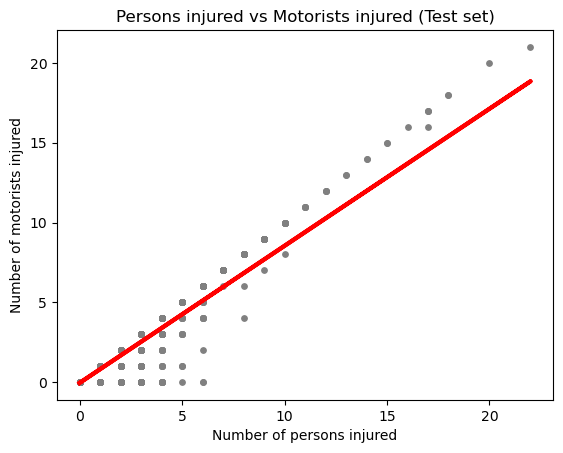

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Persons injured vs Motorists injured (Test set)')
plot_test.xlabel('Number of persons injured')
plot_test.ylabel('Number of motorists injured')
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'injured_regression.png'))
plot_test.show()

###### Notes: 
The regression line doesn't cover all the data points. There are still many points below the line where the number of motorists injured is zero while there are still other persons injured, however the trend of the line is still upwards, and generally, as the number of persons injured increases, the number of motorists injured also increases.

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [18]:
# Print the model summary statistics.

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.85860424]]
Mean squared error: 0.08007813783004013
R2 score: 0.8242255298933603


###### Notes:
- The mean squared error 0.08 is small. The regression lines passes close to many data points.
- The R2 score of 0.8 is close to 1 which indicates a good fit.

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.tail(50)

,Actual,Predicted
300292,0,-0.043754
300293,0,-0.043754
300294,0,-0.043754
300295,0,-0.043754
300296,0,-0.043754
300297,2,1.673454
300298,0,-0.043754
300299,0,-0.043754
300300,0,0.814850
300301,0,-0.043754


###### Notes:
Some of the predictions are close while others are off. I wouldn't say the regression is perfectly accurate. A source of bias are those cases where many pedestrians are affected while few motorists are. For example, there are some terrorism cases where the driver deliberately attacks pedestrians. These incidents will have mass casualties and can impact the accuracy of the model's predictions